# **Algunas Operaciones con Imágenes**

In [1]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

### **Leer imágenes a colores**



In [2]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')
print(im.shape)
# 3 RGB (jpg, jpeg, etc)
# 4 RGBA png -> R, G, B, A(Alpha) -> transparencia
# 1 capa -> escala de grises

# dimensiones:
# alto, ancho, capas

(628, 1165, 4)


In [3]:
print(im.dtype)
#  uint8 -> entero sin signo de 8 bits
# float32 -> float de 32 bits
# float64 -> float de 64 bits
# unit8 mejor a nivel de imagen pero float 32 y 64 mejor a nivel de gpu pq trabaja con matrices entre 0 y1


uint8


In [4]:
print(im.min())

0


In [5]:
print(im.max())

255


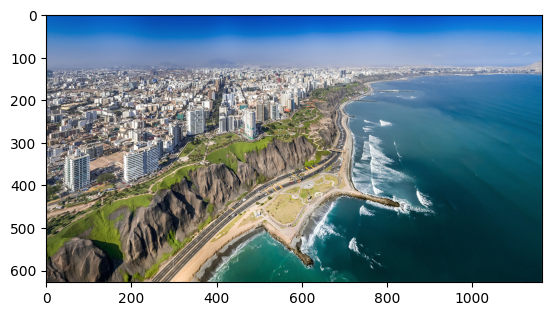

In [6]:
plt.imshow(im)

### **Leer imágenes a b/w  a.k.a. grayscale**

In [7]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png', as_gray=True)
print(im.shape)
# 628 alto, 1165 ancho, 1 capa (grises)

(628, 1165)


In [8]:
print(im.dtype)

float64


In [9]:
print(im.min())

0.0


In [10]:
print(im.max())

1.0


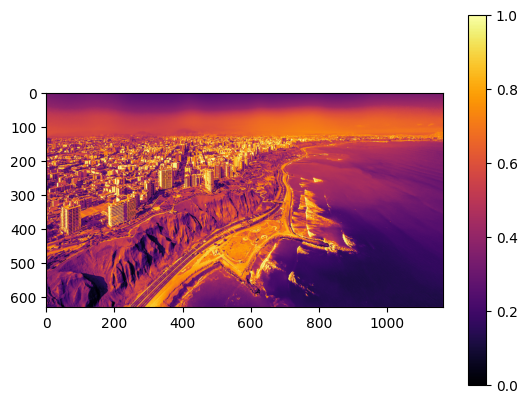

In [11]:
plt.imshow(im, cmap='inferno')
plt.colorbar()

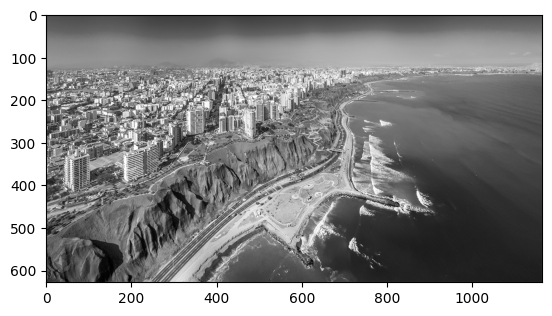

In [12]:
plt.imshow(im, cmap='gray')

### **Convertir a Blanco y Negro**

In [13]:
cursos = ['Desarrollo', 'IA', 'Comp', 'Grafica', 'Seguridad']
cursos[:2]

['Desarrollo', 'IA']

In [14]:
im = imread('http://blog.redbus.pe/wp-content/uploads/2019/12/foto-lima.png')[:,:,:3]
print(im.shape)

(628, 1165, 3)


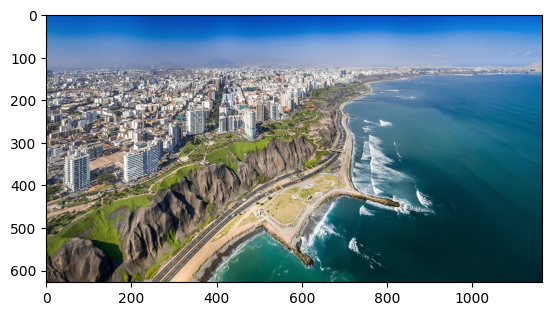

In [15]:
plt.imshow(im)

In [16]:
im = im.mean(axis=2)
im.shape

(628, 1165)

In [17]:
print(im.dtype)

float64


In [18]:
print(im.min())

0.0


In [19]:
print(im.max())

255.0


In [20]:
im = im/255

In [21]:
print(im.min())

0.0


In [22]:
print(im.max())

1.0


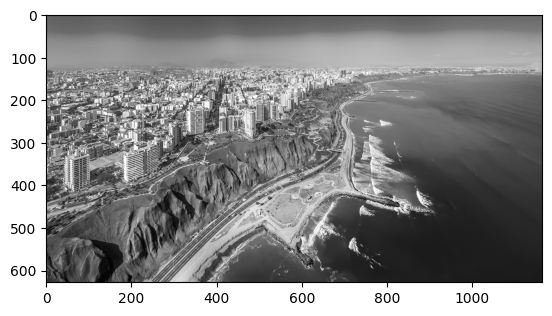

In [23]:
plt.imshow(im, cmap='gray')

### **Operaciones aritméticas con Imágenes -> Adición de imágenes e Interpolación**

In [24]:
#@title Descargar Data de Dígitos
from tensorflow.keras.datasets import mnist
from IPython.display import Image
import imageio
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


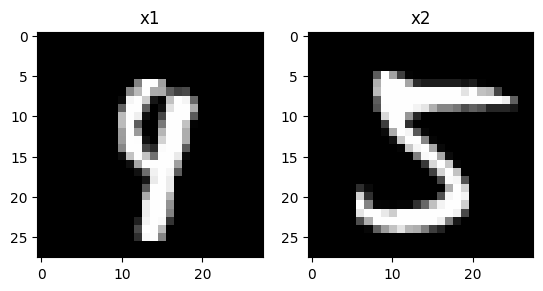

In [25]:
#@title Obtener Dígitos **x1** y **x2** (aleatoriamente)
idx1 = np.random.randint(x_test.shape[0])
idx2 = np.random.randint(x_test.shape[0])
x1 = x_test[idx1][None,:]
x2 = x_test[idx2][None,:]
plt.figure()
plt.subplot(1,2, 1)
plt.title("x1")
plt.imshow(x1[0,:,:,0], cmap='gray')
plt.subplot(1,2, 2)
plt.title("x2")
plt.imshow(x2[0,:,:,0], cmap='gray')
plt.show()

### Interpolar en el espacio de los pixeles: $x_1 + \alpha*(x_2-x_1)$ donde $0 \leq \alpha \leq 1$

In [26]:
#@title Generar GIF
gif = []
for alpha in np.linspace(0,1,100):
  pixel_diff = x1 + alpha*(x2-x1)
  gif.append(np.uint8(pixel_diff[0,:,:,0]*255))
try:
  imageio.mimsave('im.gif', gif)
except:
  pass
Image('im.gif', format='png', width=255)

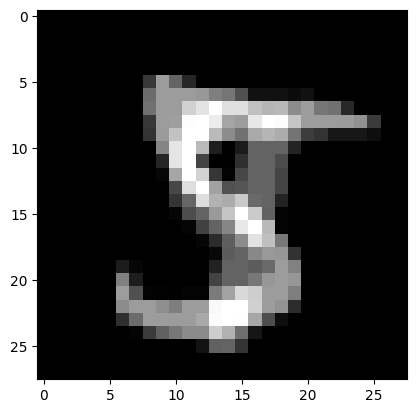

In [27]:
#@title Interpolación { run: "auto" }
alpha = 0.61 #@param {type:"slider", min:0, max:1, step:0.01}
pixel_diff = x1 + alpha*(x2-x1)
plt.imshow(pixel_diff[0,:,:,0], cmap='gray')